In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [5]:
cast.groupby(['name']).size().order().tail(10)

name
Larry Steers       536
Frank Ellis        539
Franklyn Farnum    544
Tom London         560
Harold Miller      593
Frank O'Connor     599
Lee Phelps         614
Sam (II) Harris    631
Herman Hack        672
Bess Flowers       808
dtype: int64

### Which three years of the 1930s saw the most films released?

In [6]:
c = cast
c = c[(c.year > 1929) & (c.year < 1940)].sort('year')
c.groupby('year').size().order().tail(3)

year
1938    24797
1936    25439
1937    27114
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

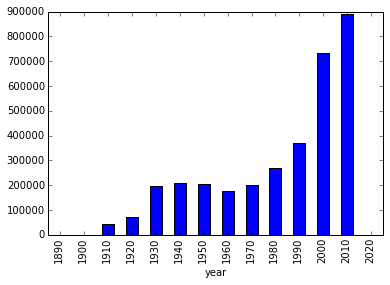

In [40]:
c = cast.sort_index()
c.groupby(c.year // 10 * 10).size().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

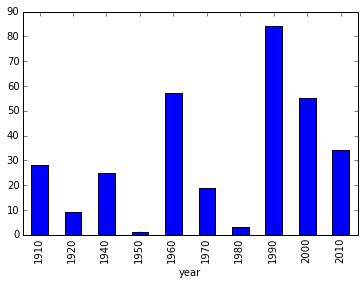

In [39]:
c = cast[cast.title == 'Hamlet'].sort_index()
c.groupby(c.year // 10 * 10).size().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

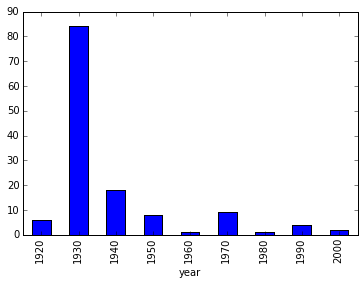

In [38]:
c = cast[cast.character == 'Rustler'].sort_index()
c.groupby(c.year // 10 * 10).size().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

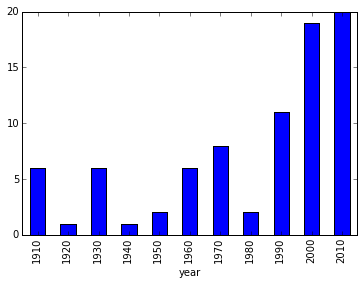

In [37]:
c = cast[cast.character == 'Hamlet'].sort_index()
c.groupby(c.year // 10 * 10).size().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [11]:
c = cast
c.groupby('character').size().order().tail(11)

character
Minor Role      5946
Party Guest     6020
Bartender       6214
Nurse           6221
Student         6485
Policeman       6541
Doctor          6908
Reporter        7682
Extra           9274
Dancer         11209
Himself        18870
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [12]:
c = cast[cast.character == 'Herself']
c.groupby('name').size().order().tail(10)

name
Marilyn Monroe          5
Kareena Kapoor          5
Sally Jessy Raphael     5
Chris Evert             5
Joan Rivers             7
Mary Jo Pehl            7
Lili?n Garc?a           7
Margaret Thatcher       8
Queen Elizabeth II     11
Joyce Brothers         14
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [13]:
c = cast[cast.character == 'Himself']
c.groupby('name').size().order().tail(10)

name
Benito Mussolini         18
Bill Clinton             20
George W. Bush           20
Winston Churchill        20
Franklin D. Roosevelt    20
John F. Kennedy          25
Ron Jeremy               25
Ronald Reagan            31
Richard Nixon            39
Adolf Hitler             93
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [15]:
c = cast[cast.year == 1945].sort()
c.groupby('name').size().order().tail(1)

name
Emmett Vogan    39
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [16]:
c = cast[cast.year == 1985].sort()
c.groupby('name').size().order().tail(1)

name
Mammootty    19
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [18]:
c = cast[cast.name == 'Mammootty'].sort('year')
c.groupby('year').size()

year
1971     1
1980     1
1981     3
1982     6
1983    17
1984    16
1985    19
1986    15
1987     9
1988     7
1989     9
1990    15
1991     5
1992     3
1993     5
1994     4
1995     5
1996     3
1997     2
1998     3
1999     4
2000     7
2001     3
2002     3
2003     2
2004     8
2005     6
2006     8
2007     7
2008     9
2009    12
2010     9
2011     7
2012     7
2013     5
2014     6
2015     3
dtype: int64

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [23]:
c = cast[cast.character.str.startswith('Patron in')]
c.groupby('character').size().order().tail(10)

character
Patron in Audience               2
Patron in Club                   3
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Bar                    4
Patron in Billiard Parlor        5
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Frisky Rabbit         16
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [24]:
c = cast[cast.character.str.startswith('Science')]
c.groupby('character').size().order().tail(10)

character
Science Fair Kid         3
Science teacher          3
Science Promo Cadet      4
Science Kid              4
Science Fair Judge       4
Science Club Member      5
Science Reporter         5
Science Fair Student     8
Science Student          9
Science Teacher         54
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

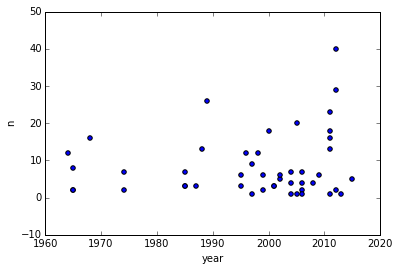

In [43]:
c = cast
c = c[c.name == 'Judi Dench'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')


### Plot the n-values of Cary Grant's roles through his career.

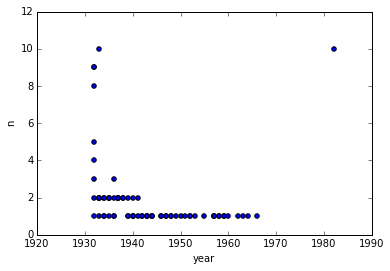

In [44]:
c = cast
c = c[c.name == 'Cary Grant'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

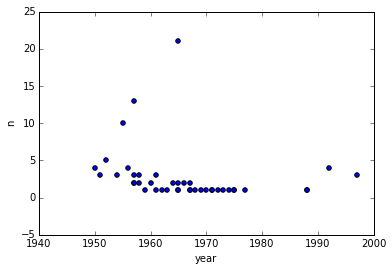

In [45]:
c = cast
c = c[c.name == 'Sidney Poitier'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [47]:
c = cast
c= c[(c.year // 10 == 195) & (c.n ==1)] 
c.type.value_counts()

actor      6392
actress    2822
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [ ]:
c = cast
c= c[(c.year // 10 == 195) & (c.n == 2)] 
c.type.value_counts()